In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [28]:
nu = notebookUtils()
model_name = "queenmaker"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('BOP', 'close', ''), ('PSAR', 'close', ''), ('optimal_v2', 'close', '')],
                            param_spec={},
                            optimal_threshold={'buy':(0.01,0.02)},
                            
                            spans=[
                                    {'indicator_name':'natr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [30, 300]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2, 10, 30, 200]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10, 30, 200]},
                                    {'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10, 30, 200]},
                                    
                                    ],

                            scale='minmaxwindow')

Loading data from ALGO...
Loading data from chunk 0...
Loading data from OMG...
Loading data from chunk 0...
Loading data from LTC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from IOTA...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from ONT...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from QTUM...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from NEO...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from BTC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data f

In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,BOP,PSAR,optimal,NATR_close_period_30,NATR_close_period_300,CMO_close_period_2,CMO_close_period_10,CMO_close_period_30,CMO_close_period_200,CCI_close_period_10,CCI_close_period_30,CCI_close_period_200,WILLR_close_period_10,WILLR_close_period_30,WILLR_close_period_200
15299,1.134208,0.000000,0.431062,0.0,0.280972,0.319924,0.713180,0.882930,0.781082,0.549381,0.642687,0.724777,0.622424,0.823075,0.874056,0.895378
15300,1.132604,0.250000,0.450494,0.0,0.282078,0.320859,0.404918,0.814358,0.753798,0.543843,0.577442,0.669836,0.600554,0.754446,0.831833,0.871488
15301,1.132802,0.250000,0.452339,0.0,0.274427,0.319665,0.462315,0.816403,0.755066,0.544526,0.585762,0.662747,0.605862,0.752525,0.837047,0.874254
15302,1.131901,0.500000,0.469644,0.0,0.271248,0.319597,0.246234,0.775029,0.739516,0.541406,0.554891,0.641717,0.598636,0.691693,0.813328,0.861671
15303,1.129950,0.400000,0.490159,0.0,0.274147,0.320912,0.081435,0.690650,0.706699,0.534672,0.392444,0.608567,0.577914,0.569214,0.761980,0.834432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,0.007594,0.500000,0.626518,0.0,0.402009,0.520033,0.852420,0.515838,0.456786,0.382252,0.559780,0.481906,0.448323,0.460800,0.459889,0.360959
11372818,0.007597,0.645833,0.622635,0.0,0.520978,0.545278,0.885579,0.527163,0.462615,0.384774,0.306305,0.363976,0.399873,0.730146,0.730341,0.438203
11372819,0.007554,0.954545,0.745118,0.0,0.616028,0.570246,0.111013,0.372351,0.389904,0.354186,0.220174,0.285220,0.347444,0.569340,0.568874,0.341323
11372820,0.007537,0.576923,0.723859,0.0,0.668616,0.584240,0.066315,0.329957,0.365766,0.342774,0.462815,0.414331,0.412626,0.547746,0.506659,0.303994


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,BOP,PSAR,NATR_close_period_30,NATR_close_period_300,CMO_close_period_2,CMO_close_period_10,CMO_close_period_30,CMO_close_period_200,CCI_close_period_10,CCI_close_period_30,CCI_close_period_200,WILLR_close_period_10,WILLR_close_period_30,WILLR_close_period_200
0,1.366126,0.000000,0.516789,0.105725,0.127409,5.716954e-01,0.844310,0.864819,0.625574,0.643838,0.683183,0.730844,0.592964,0.847687,0.919865
1,8670.600551,0.493749,0.314994,0.416584,0.806567,9.832374e-01,0.638896,0.405784,0.260838,0.805516,0.712696,0.403274,0.721538,0.659972,0.151357
2,11757.112156,0.464864,0.500701,0.124739,0.135125,9.030811e-01,0.542263,0.471358,0.537410,0.510170,0.485817,0.524324,0.486683,0.528310,0.649509
3,0.959470,0.916667,0.626937,0.183153,0.047973,8.317829e-03,0.305092,0.458983,0.511544,0.334719,0.340023,0.534657,0.247549,0.244365,0.383740
4,7.112839,0.200000,0.441227,0.032833,0.201484,8.613994e-01,0.393125,0.461333,0.535616,0.493055,0.490206,0.455866,0.177606,0.141237,0.463213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167320,421.153557,0.070681,0.637555,0.321346,0.145427,2.398950e-02,0.170022,0.114244,0.068297,0.250757,0.438789,0.271286,0.174794,0.103919,0.031375
167321,658.816968,0.696000,0.322963,0.203610,0.359530,9.676471e-01,0.786954,0.611265,0.460971,0.771683,0.759102,0.551998,0.843687,0.850878,0.741736
167322,92.399444,0.245283,0.495516,0.154651,0.257004,3.251432e-07,0.017482,0.130776,0.289652,0.265738,0.243907,0.205648,0.194520,0.147523,0.133323
167323,0.667454,0.266667,0.545881,0.294185,0.597642,9.228437e-02,0.385123,0.484162,0.594664,0.438303,0.404057,0.591293,0.253117,0.336676,0.453249


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [7]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
callbacks = []

#stop model from training when it starts to get bad
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0, 
                                patience=5, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks.append(early_stop)


# # getting the model_version name for the model checkpoint callback
# # keep is_nn to false here so it doesn't save the model just yet
# version_number = nu.exportModel(model, model_name, False, indicators, features, proba_threshold=0.0, is_nn=False, save_model=False)

# #saving model when validation accuracy gets better
# checkpoint_call = tf.keras.callbacks.ModelCheckpoint(f'./v2/strategy/saved_models/{model_name}/{version_number}', 
#                                      monitor='val_accuracy', 
#                                      verbose=0, 
#                                      save_best_only=True,
#                                      save_weights_only=False, 
#                                      mode='auto', 
#                                      save_freq='epoch')
# callbacks.append(checkpoint_call)

# if not os.path.isdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs'):
#     os.mkdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs')
# tensorb = tf.keras.callbacks.TensorBoard(log_dir=f'./v2/strategy/saved_models/{model_name}/{version_number}/logs',
#                                  histogram_freq=0, 
#                                  write_graph=True, 
#                                  write_images=False,    
#                                  update_freq='epoch', 
#                                  profile_batch=2, 
#                                  embeddings_freq=0,    
#                                  embeddings_metadata=None)
# callbacks.append(tensorb)

In [9]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, callbacks=callbacks, epochs=30, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/30
5229/5229 [==============================] - 56s 11ms/step - loss: 0.4528 - accuracy: 0.7230 - val_loss: 0.4150 - val_accuracy: 0.7129
Epoch 2/30
5229/5229 [==============================] - 62s 12ms/step - loss: 0.4164 - accuracy: 0.7366 - val_loss: 0.4104 - val_accuracy: 0.7429
Epoch 3/30
5229/5229 [==============================] - 59s 11ms/step - loss: 0.4112 - accuracy: 0.7398 - val_loss: 0.4223 - val_accuracy: 0.6915
Epoch 4/30
5229/5229 [==============================] - 62s 12ms/step - loss: 0.4063 - accuracy: 0.7433 - val_loss: 0.4555 - val_accuracy: 0.6996
Epoch 5/30
5229/5229 [==============================] - 61s 12ms/step - loss: 0.4029 - accuracy: 0.7449 - val_loss: 0.4586 - val_accuracy: 0.7073
Epoch 6/30
5229/5229 [==============================] - 59s 11ms/step - loss: 0.4009 - accuracy: 0.7484 - val_loss: 0.3953 - val_accuracy: 0.7380
Epoch 7/30
5229/5229 [==============================] - 60s 12ms/step - loss: 0.3994 - accuracy: 0.7498 - val_loss: 0.4936 -

In [21]:
reduced_classified_data = nu.classifyPoints([model], testX, predict_proba=True, proba_thresh=[0.85], plot_optimal=False, optimal=testy, is_nn=True)

In [26]:
smaller_view_data = reduced_classified_data[106000:109000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

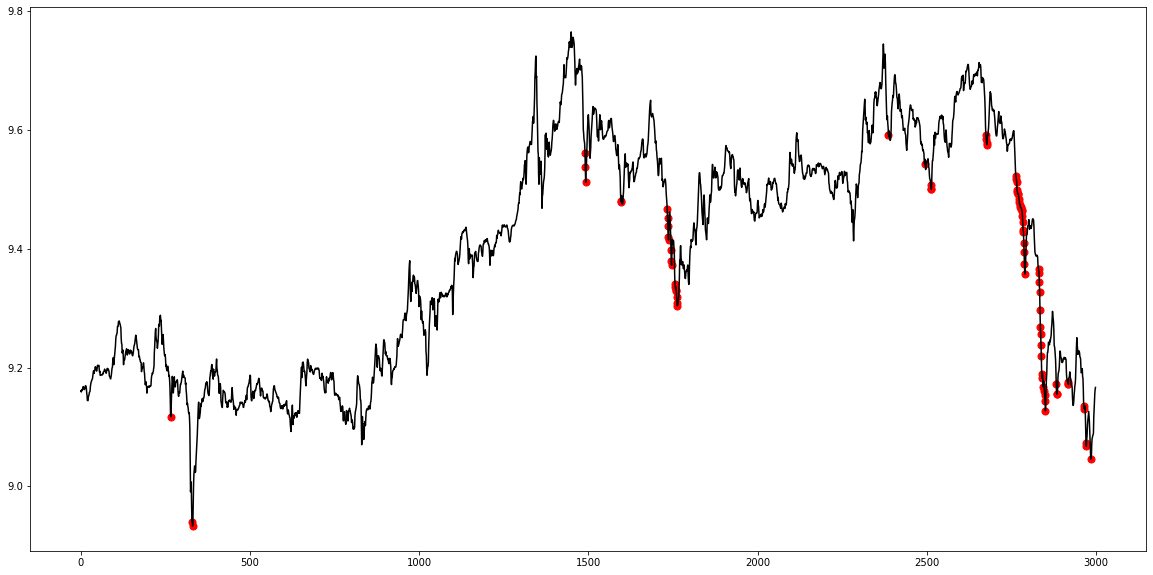

In [27]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [30]:
model_version = nu.exportModel(model, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.85, is_nn=True)

INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/queenmaker/1_1/assets


In [26]:
# score, trades = nu.testModel(model_name, num_processes=4)

Importing Strategies...
Generating Model Data...
Preprocessing Model Predictions...
0it [00:00, ?it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 142366.77it/s]
Generating Report...


TypeError: cannot unpack non-iterable NoneType object